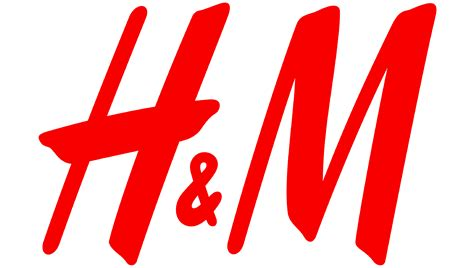

# Table of Contents

* [Exploratory Data Analysis & data preprocessing](#data)
    * [Loading data](#data)
    * [Exploring articles.csv](#articles)
        * [How is this data useful ?](#articles_use)
        * [What processing needed ?](#articles_processing)
    * [Exploring customers.csv](#customers)
        * [How is this data useful ?](#customers_use)
        * [What processing needed ?](#customers_processing)
    * [Exploring transactions_train.csv.csv](#transactions)
        * [How is this data useful ?](#transactions_use)
        * [What processing needed ?](#transactions_processing)
    * [Structure of data and link between datasets](#structure)
    
    
* [Recommendation system](#Recommendation)
    * [List and description of recommendation algorithms](#algos)
    
    
    
    feature engineering 

# Exploratory Data Analysis & data preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Loading data <a class="anchor" id="data"></a>

In [2]:
# articles = pd.read_csv('./Data/articles.csv')

raw_articles = pd.read_csv('./Data/articles.csv', dtype={'article_id': 'str','customer_id':'str'})
articles=raw_articles.copy()

In [3]:
raw_customers = pd.read_csv('./Data/customers.csv')
customers=raw_customers.copy()

In [4]:
raw_transactions=pd.read_csv('./Data/transactions_train.csv', dtype={'article_id': 'str','customer_id':'str'})
transactions=raw_transactions.copy()

In [5]:
len(transactions)

31788324

## Q1. Top 100 most sold products

In [6]:
Sold_quantities=transactions.groupby('article_id').agg(quantities_sold=('price','count'))
Sold_quantities=Sold_quantities.reset_index()
ordered_sold_quantities=Sold_quantities.sort_values('quantities_sold',ascending=False)

In [7]:
top_100=ordered_sold_quantities.head(100)
top_30=ordered_sold_quantities.head(30)

In [8]:
top_100_details=top_100.merge(articles,on='article_id')
top_30_details=top_30.merge(articles,on='article_id')

In [9]:
top_30_by_product=top_30_details.groupby('prod_name')['quantities_sold'].sum()
top_30_by_product=top_30_by_product.sort_values(ascending=False)
top_30_by_product

prod_name
Jade HW Skinny Denim TRS       122142
7p Basic Shaftless              56176
Tilly (1)                       52650
Luna skinny RW                  41183
Tilda tank                      26329
Greta Thong Mynta Low 3p        25025
Curvy Jeggings HW Ankle         22236
SUPREME RW tights               21063
Box 4p Tights                   21013
Lazer Razer Brief               20415
Skinny Ankle R.W Brooklyn       20242
Ringo hipbelt                   19834
Mariette Blazer                 19379
Perrie Slim Mom Denim TRS       19216
Henry polo. (1)                 19143
Pluto RW slacks (1)             18263
Scallop 5p Socks                17886
3p Sneaker Socks                17866
Simple as that Cheeky Tanga     17754
Kanta slacks RW                 16690
Highwaist 30 den 1p Tights      16533
New Girl Push Top               15906
Calista cardigan.               15612
Julia RW Skinny Denim TRS       15245
Name: quantities_sold, dtype: int64

In [10]:
top_30_by_product_group=top_30_details.groupby('product_group_name')['quantities_sold'].sum()
top_30_by_product_group=top_30_by_product_group.sort_values(ascending=False)
top_30_by_product_group

product_group_name
Garment Lower body    312813
Garment Upper body    133113
Socks & Tights        112941
Swimwear               54075
Underwear              25025
Accessories            19834
Name: quantities_sold, dtype: int64

In [11]:
top_30_by_department=top_30_details.groupby('department_name')['quantities_sold'].sum()
top_30_by_department=top_30_by_department.sort_values(ascending=False)
top_30_by_department

department_name
Trousers                    156603
Shopbasket Socks             91928
Trouser                      76136
Swimwear                     54075
Jersey Basic                 52650
Tights basic                 37546
Knitwear                     34755
EQ Divided Basics            26329
Casual Lingerie              25025
Denim Trousers               22236
Ladies Sport Bottoms         21063
Everyday Waredrobe Denim     20242
Belts                        19834
Suit                         19379
Name: quantities_sold, dtype: int64

In [12]:
top_30_by_index=top_30_details.groupby('index_name')['quantities_sold'].sum()
top_30_by_index=top_30_by_index.sort_values(ascending=False)
top_30_by_index

index_name
Lingeries/Tights      208574
Divided               205168
Ladieswear            203162
Sport                  21063
Ladies Accessories     19834
Name: quantities_sold, dtype: int64

In [13]:
top_30_by_section=top_30_details.groupby('section_name')['quantities_sold'].sum()
top_30_by_section=top_30_by_section.sort_values(ascending=False)
top_30_by_section

section_name
Divided Collection                156603
Womens Nightwear, Socks & Tigh    129474
Womens Everyday Collection         76136
Womens Tailoring                   54134
Womens Swimwear, beachwear         54075
Womens Everyday Basics             52650
Ladies Denim                       42478
Divided Complements Other          26329
Womens Lingerie                    25025
Ladies H&M Sport                   21063
Womens Big accessories             19834
Name: quantities_sold, dtype: int64

In [17]:
top_30_by_product=top_30_details.groupby('prod_name')['quantities_sold'].sum()
top_30_by_product=top_30_by_product.sort_values(ascending=False).head(30)
top_30_by_product
total_sales=Sold_quantities['quantities_sold'].sum()
# top_100=top_100.reset_index()
top_30['quantities_sold_%']=round(top_30['quantities_sold']*100/total_sales,2)
top_30

C:\Users\amaur\AppData\Local\Temp\ipykernel_77692\4246292069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_30['quantities_sold_%']=round(top_30['quantities_sold']*100/total_sales,2)


,article_id,quantities_sold,quantities_sold_%
53832,0706016001,50287,0.16
53833,0706016002,35043,0.11
1711,0372860001,31718,0.10
24808,0610776002,30199,0.10
70124,0759871002,26329,0.08
3706,0464297007,25025,0.08
1712,0372860002,24458,0.08
24807,0610776001,22451,0.07
2233,0399223001,22236,0.07
53834,0706016003,21241,0.07


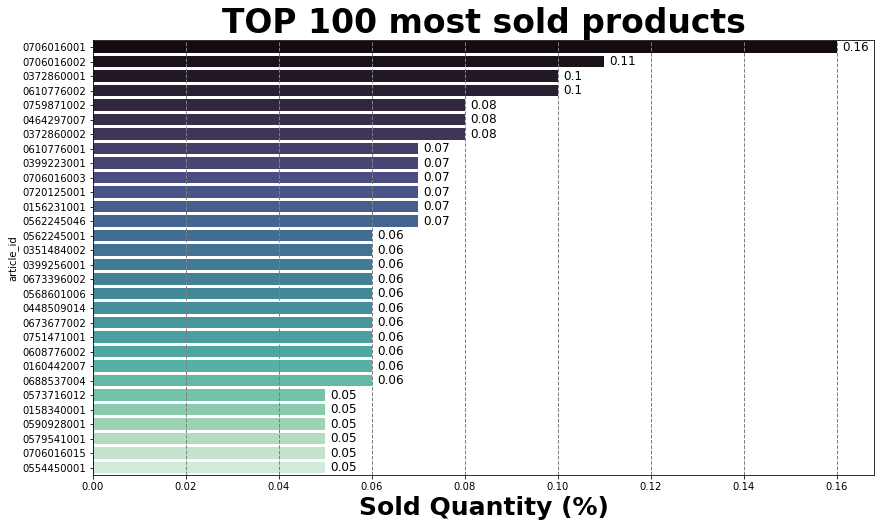

In [18]:
plt.figure(figsize=(14,8))
plt.title("TOP 100 most sold products", fontsize=33, fontweight="bold")
g = sns.barplot(y="article_id", x="quantities_sold_%", data=top_30, palette="mako", ci=False,orient='h')

for container in g.containers:
    g.bar_label(container, padding = 5, fontsize=12)
plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("article_id")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1)
plt.show()

NameError: name 'top_100_price_details' is not defined

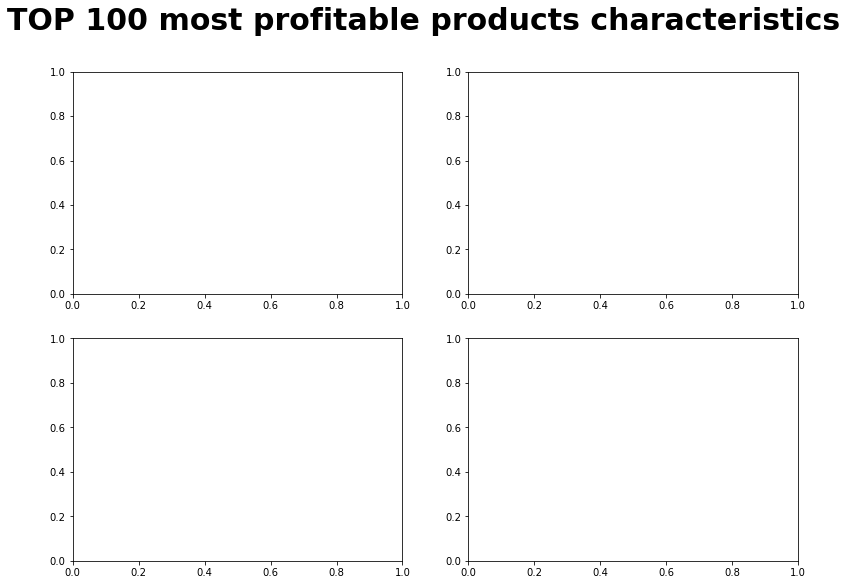

In [21]:
# creating a plot with 2 by 2 subplots
fig, ax = plt.subplots(2,2, figsize=(13,9))

# Setting the common title for all 4 subplots 
plt.suptitle("TOP 100 most profitable products characteristics", fontweight="bold", fontsize=30)



# Creating subplot 1 : [0,0], in barplot you set ax=ax[0,0], we use sns (seaborn) as it is nicer
# g = sns.barplot(y="colomn to use in data for the y axis", x="colomn to use in data for the x axis", data=data to use (can be a dataframe),
#             ax='subplot to use for display example: ax[0,0]',palette="color to use: Blues_r", ci= ' ?? True or False)
# cifloat or "sd" or None, optional
# Size of confidence intervals to draw around estimated values. If “sd”, skip bootstrapping and draw the standard deviation of the observations. If None, no bootstrapping will be performed, and error bars will not be drawn.
g = sns.barplot(y="product_type_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,0],palette="Blues_r", ci=False)


for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=14, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


# Creating subplot 1 : [0,1]
g = sns.barplot(y="index_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', padding = 5, fontsize=18, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


# Creating subplot 1 : [1,0]
g = sns.barplot(y="colour_group_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


# Creating subplot 1 : [1,1]
g = sns.barplot(y="product_group_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', padding=5, fontsize=18, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()


# Show everything
plt.show() 


## Q2. Top 100 most profitable products

In [ ]:
products_revenues=transactions.groupby('article_id').agg(revenues=('price','sum'))
products_revenues=products_revenues.reset_index()
ordered_revenues=products_revenues.sort_values('revenues',ascending=False)
# top_100_products=ordered_revenues.head(100)
# top_30_products=ordered_revenues.head(30)

In [ ]:
# top_100_products_details=top_100_products.merge(articles,on='article_id')
# top_30_products_details=top_30_products.merge(articles,on='article_id')
revenues_details=ordered_revenues.merge(articles,on='article_id')
revenues_details.head(30)

## Q3 - Which are articles that generated lower earnings for the company?

In [ ]:
revenues_details.tail(30)

## Q3. Fashion news frequency by age group

In [ ]:
customers.groupby('fashion_news_frequency')

## Q4. Average product bought by age group

In [ ]:
customers['age_groups'] = pd.cut(customers['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])
customers

In [ ]:
quant_per_cust=transactions.groupby('customer_id').agg(purchased_quantities=('price','count'))

In [ ]:
purchases=quant_per_cust.merge(customers,on='customer_id')

In [ ]:
purchases.sort_values('purchased_quantities',ascending=False)

In [ ]:
group_age_purchases=purchases.groupby('age_groups').agg(avg_purchase=('purchased_quantities',np.mean))

In [ ]:
group_age_purchases.head()

## Q5. Average product bought by Fashion News frequency

In [ ]:
FNF_purchases=purchases.groupby('fashion_news_frequency').agg(avg_purchase=('purchased_quantities',np.mean))

In [ ]:
FNF_purchases.head()

## Q6. Purchased Quantity by Customer KDE  sns.kdeplot

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Sold Quantity KDE plot")
sns.kdeplot(df_sold_qty["sold_qty"])
plt.xlabel("Sold Quantity")
plt.show()

## Q7 - Are there articles that have been sold only once?

In [ ]:
num_sold=transactions.groupby('article_id').agg(num_sold=('price','count'))

In [ ]:
num_sold.sort_values('num_sold')

In [ ]:
once=num_sold[num_sold['num_sold']==1]

In [ ]:
once

## Q9 - Which age group generates more earnings?

In [ ]:
earnings_per_customer=transactions.groupby('customer_id').agg(earnings=('price','sum'))

In [ ]:
cust_with_earnings=earnings_per_customer.merge(customers,on='customer_id')

In [ ]:
cust_with_earnings.sort_values('earnings',ascending=False).head(20)

In [ ]:
temp = articles.groupby(["garment_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({"Garment Group": temp.index, "Product Types": temp.values})
df = df.sort_values(["Product Types"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of Product Types per each Garment Group")
s = sns.barplot(x="Garment Group", y="Product Types", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

# Other

In [ ]:
temp = articles.groupby(["colour_group_name"])["prod_name"].nunique()
df = pd.DataFrame({"Colour Name": temp.index, "Product names": temp.values})
df = df.sort_values(["Product names"], ascending=False)
plt.figure(figsize=(20, 5))
plt.title(
    "Number of Product Names per Colour -- a.k.a is there anything darker than black?"
)
s = sns.barplot(x="Colour Name", y="Product names", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

### age

In [ ]:
temp = customers.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({"Age": temp.index, "Customers": temp.values})
df = df.sort_values(["Age"], ascending=False)
plt.figure(figsize=(20, 5))
plt.title(f"Number of Customers by Age")
s = sns.barplot(x="Age", y="Customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()